In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

np.random.seed(9876789)

In [2]:
#let's start with a random sample

#we want 100 samples
nsamples = 100

#this is going to give is a sloping line that goin from 0, 1 with 100 samples in it
x = np.linspace(0, 10, nsamples)

#We are going to pass X through as x axis and then make the x^2 
X = np.column_stack((x, x**2))

#then we make an array
beta = np.array([1, 0.1, 10])

#then we make a random distribution
e = np.random.normal(size = nsamples)

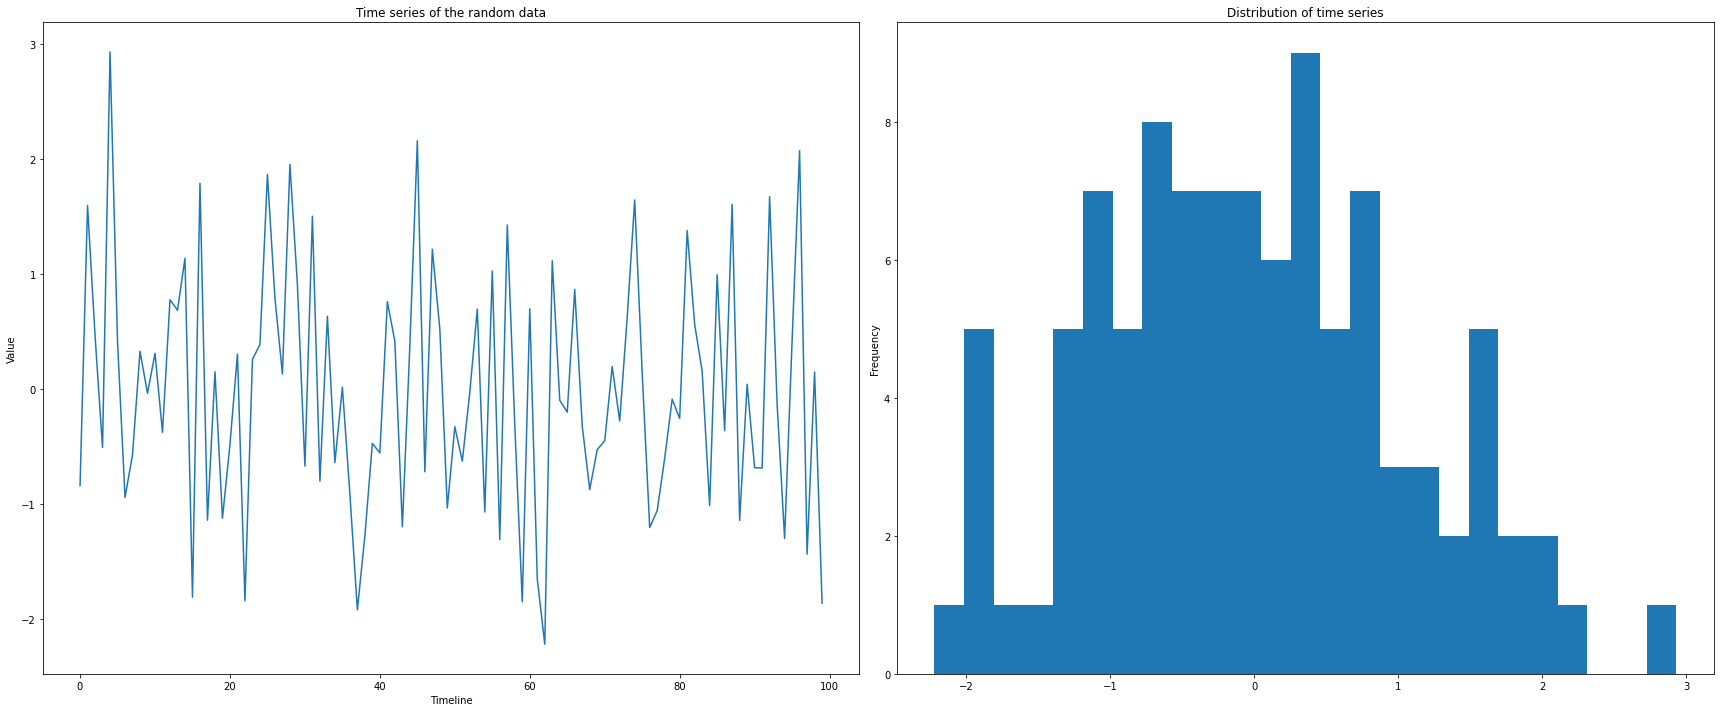

In [3]:
#lets look at the distribution plotted
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (24,10))

axs[0].plot(e)
axs[0].set_title("Time series of the random data")
axs[0].set_ylabel("Value")
axs[0].set_xlabel("Timeline")

axs[1].hist(e, bins = 25)
axs[1].set_title("Distribution of time series")
axs[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

In [4]:
#we want an intercept
X = sm.add_constant(X)

#then do this which I think will give the intercept
y = np.dot(X, beta) + e

In [5]:
#now we need to make the model
model = sm.OLS(y, X)

#then fit the model
result = model.fit()

#then give teh results
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.020e+06
Date:                Fri, 04 Jun 2021   Prob (F-statistic):          2.83e-239
Time:                        01:05:13   Log-Likelihood:                -146.51
No. Observations:                 100   AIC:                             299.0
Df Residuals:                      97   BIC:                             306.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3423      0.313      4.292      0.0

In [6]:
#then we can get the parameters by referencing them and the variable is a dictionary
print("Parameters:", result.params)
print("R2:", result.rsquared)

Parameters: [ 1.34233516 -0.04024948 10.01025357]
R2: 0.9999879365025871


In [8]:
#now lets say you have nonlinear curve
nsample = 50
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x-5)**2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.]

y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

In [9]:
#no we want to fit the model
res = sm.OLS(y,X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     211.8
Date:                Fri, 04 Jun 2021   Prob (F-statistic):           6.30e-27
Time:                        01:06:47   Log-Likelihood:                -34.438
No. Observations:                  50   AIC:                             76.88
Df Residuals:                      46   BIC:                             84.52
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4687      0.026     17.751      0.0

In [10]:
#lets get the paramters
print("Parameters:", res.params)
print("Standard Error:", res.bse)
print("Predicted Values:", res.predict())

Parameters: [ 0.46872448  0.48360119 -0.01740479  5.20584496]
Standard Error: [0.02640602 0.10380518 0.00231847 0.17121765]
Predicted Values: [ 4.77072516  5.22213464  5.63620761  5.98658823  6.25643234  6.44117491
  6.54928009  6.60085051  6.62432454  6.6518039   6.71377946  6.83412169
  7.02615877  7.29048685  7.61487206  7.97626054  8.34456611  8.68761335
  8.97642389  9.18997755  9.31866582  9.36587056  9.34740836  9.28893189
  9.22171529  9.17751587  9.1833565   9.25708583  9.40444579  9.61812821
  9.87897556 10.15912843 10.42660281 10.65054491 10.8063004  10.87946503
 10.86825119 10.78378163 10.64826203 10.49133265 10.34519853 10.23933827
 10.19566084 10.22490593 10.32487947 10.48081414 10.66779556 10.85485568
 11.01006072 11.10575781]


[]

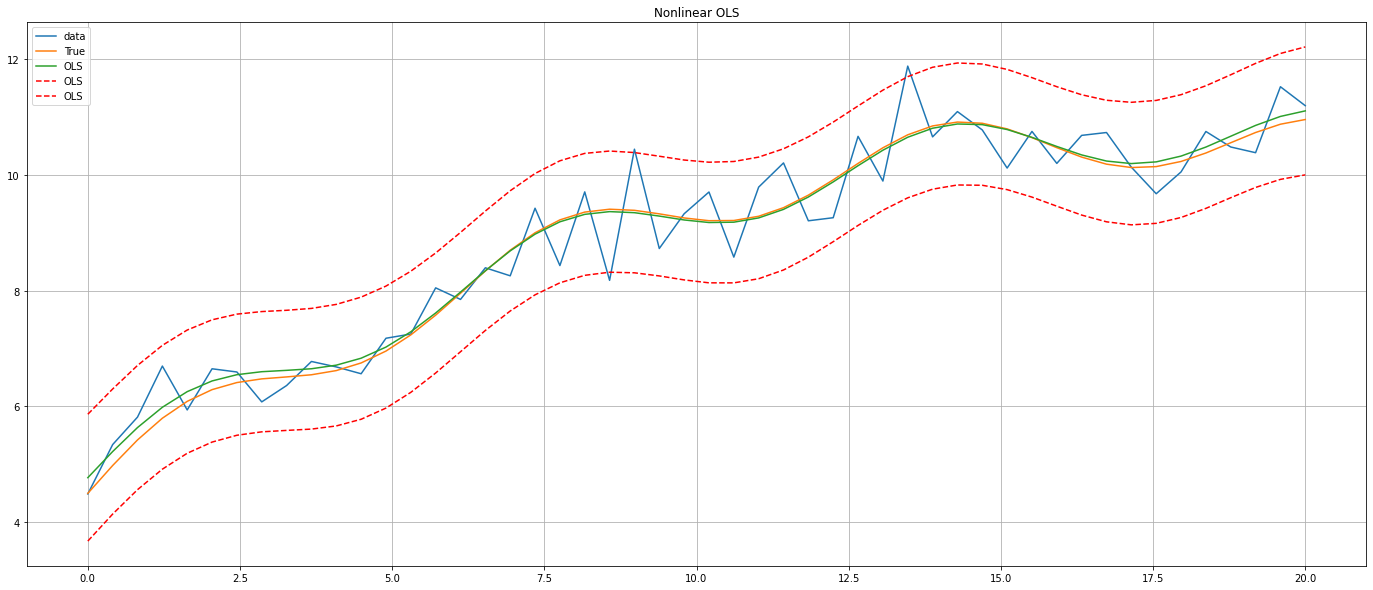

In [23]:
#now lets make the plots
prstd, iv_l, iv_u = wls_prediction_std(res)

#this plot this

plt.figure(figsize = (24,10))
plt.plot(x,y, label = "data")
plt.plot(x, y_true, label = "True")
plt.plot(x, res.fittedvalues, label = "OLS")
plt.plot(x, iv_u, 'r--', label = 'OLS')
plt.plot(x, iv_l, 'r--', label = "OLS")

plt.legend()
plt.title("Nonlinear OLS")
plt.grid(True)
plt.plot()

In [28]:
nsamples = 50

#make a space of 50 
groups = np.zeros(nsample, int)

#the first 20 will be 0s

#the next 20 will be 1s
groups[20:40] = 1

#then next 20 will be 2s 
groups[40:] = 2
groups

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

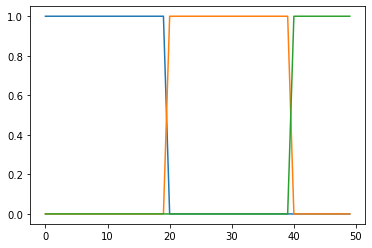

In [30]:
dummy = pd.get_dummies(groups).values
plt.plot(dummy)

In [38]:
#make space again
x = np.linspace(0, 20, nsamples)

#then drop reference category
X = np.column_stack((x, dummy[:,1:]))
X

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.40816327,  0.        ,  0.        ],
       [ 0.81632653,  0.        ,  0.        ],
       [ 1.2244898 ,  0.        ,  0.        ],
       [ 1.63265306,  0.        ,  0.        ],
       [ 2.04081633,  0.        ,  0.        ],
       [ 2.44897959,  0.        ,  0.        ],
       [ 2.85714286,  0.        ,  0.        ],
       [ 3.26530612,  0.        ,  0.        ],
       [ 3.67346939,  0.        ,  0.        ],
       [ 4.08163265,  0.        ,  0.        ],
       [ 4.48979592,  0.        ,  0.        ],
       [ 4.89795918,  0.        ,  0.        ],
       [ 5.30612245,  0.        ,  0.        ],
       [ 5.71428571,  0.        ,  0.        ],
       [ 6.12244898,  0.        ,  0.        ],
       [ 6.53061224,  0.        ,  0.        ],
       [ 6.93877551,  0.        ,  0.        ],
       [ 7.34693878,  0.        ,  0.        ],
       [ 7.75510204,  0.        ,  0.        ],
       [ 8.16326531,  1.        ,  0.   

In [40]:
X = sm.add_constant(X, prepend = False)

beta = [1, 3, -3, 10]
y_true = np.dot(X, beta)
e = np.random.normal(size = nsample)
y = y_true + e

In [41]:
res2 = sm.OLS(y, X).fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     671.7
Date:                Fri, 04 Jun 2021   Prob (F-statistic):           5.69e-38
Time:                        09:05:32   Log-Likelihood:                -64.643
No. Observations:                  50   AIC:                             137.3
Df Residuals:                      46   BIC:                             144.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9999      0.060     16.689      0.0

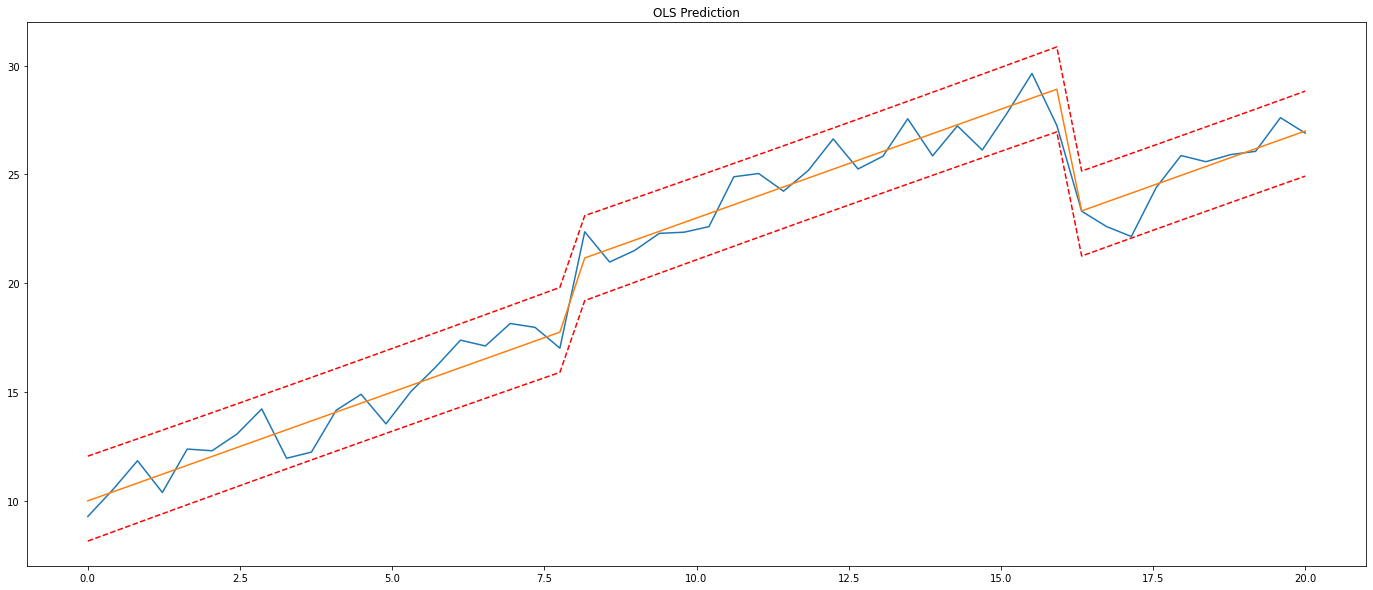

In [47]:
#now make the predicted values through
prtstd, iv_l, iv_u = wls_prediction_std(res2)

plt.figure(figsize = (24,10))
plt.plot(x, y, label = "Data")
plt.plot(x, y_true, label = "True")
plt.plot(x, iv_u, 'r--')
plt.plot(x, iv_l, 'r--')

plt.title("OLS Prediction")
plt.show()